In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df = pd.read_csv("Dataset.csv")
df.head()

review sentiment
0  Poor infrastructure with broken chairs and non...  negative
1  There is no career counseling or guidance prov...  negative
2  Administration is very unresponsive, and any i...  negative
3  There are no extracurricular activities, and t...  negative
4  The Wi-Fi never works properly, making it hard...  negative

In [3]:
df.shape,df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     900 non-null    object
 1   sentiment  900 non-null    object
dtypes: object(2)
memory usage: 14.2+ KB


((900, 2), None)

In [4]:
#not_used_cols = ['subreddit','post_id','sentence_range','confidence','social_timestamp']
#df1 = df.drop(not_used_cols,axis=1)
#df1.sample(3)  


# Define the columns you want to drop
columns_to_drop = []

# Drop the specified columns
df1 = df.drop(columns=columns_to_drop, axis=1)

# Display a sample of the modified DataFrame
df1.sample(3)


review sentiment
693  The college has excellent security measures wi...  positive
111                        Canteen food is unhygienic.  negative
18   The canteen food is unhygienic, and there are ...  negative

In [5]:
#df1['label'].unique()

df1['sentiment'].unique()


array(['negative', 'neutral', 'positive'], dtype=object)

In [6]:
#df1['label'].unique()  

!pip install nltk

In [7]:
import nltk 

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Balaji\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:

import nltk 
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Balaji\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [9]:
!pip install spacy

In [10]:
import nltk
import re
from urllib.parse import urlparse
from spacy import load
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [11]:
nltk.download('omw-1.4') # Open Multilingual Wordnet, this is an lexical database 
nltk.download('wordnet') 
nltk.download('wordnet2022')
nltk.download('punkt')
nltk.download('stopwords')
! cp -rf /usr/share/nltk_data/corpora/wordnet2022 /usr/share/nltk_data/corpora/wordnet

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Balaji\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Balaji\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet2022 to
[nltk_data]     C:\Users\Balaji\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet2022 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Balaji\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Balaji\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
'cp' is not recognized as an internal or external command,
operable program or batch file.


In [12]:
lemmatizer = WordNetLemmatizer()
stop_words = list(stopwords.words('english'))
print(stop_words)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

### Regular expressions for cleaning text data

In [13]:
def textPocess(sent):
    try:
        # brackets replacing by space
        sent = re.sub('[][)(]',' ',sent)

        # url removing
        sent = [word for word in sent.split() if not urlparse(word).scheme]
        sent = ' '.join(sent)

        # removing escap characters
        sent = re.sub(r'\@\w+','',sent)

        # removing html tags 
        sent = re.sub(re.compile("<.*?>"),'',sent)

        # getting only characters and numbers from text
        sent = re.sub("[^A-Za-z0-9]",' ',sent)

        # lower case all words
        sent = sent.lower()
        
        # strip all words from sentences
        sent = [word.strip() for word in sent.split()]
        sent = ' '.join(sent)

        # word tokenization
        tokens = word_tokenize(sent)
        
        # removing words which are in stopwords
        for word in tokens:
            if word in stop_words:
                tokens.remove(word)
        
        # lemmatization
        sent = [lemmatizer.lemmatize(word) for word in tokens]
        sent = ' '.join(sent)
        return sent
    
    except Exception as ex:
        print(sent,"\n")
        print("Error ",ex)
    

In [15]:
df1['processed_text'] = df1['review'].apply(lambda text: textPocess(text))
df1.sample(3)

review sentiment  \
235  The faculty is not supportive at all, and they...  negative   
586  Internship opportunities are available, but on...   neutral   
34   There are no extracurricular activities, and t...  negative   

                                        processed_text  
235  faculty not supportive all they rarely respond...  
586  internship opportunity available only selected...  
34   are extracurricular activity the college focus...

In [17]:
print("without process ----> ",df1['review'].iloc[23],end='\n\n')
print("after process ----> ",df1['processed_text'].iloc[23])

without process ---->  No practical projects are assigned to students, making it hard to gain hands-on experience.

after process ---->  practical project assigned student making hard gain hand experience


## Vectorization / Word embedding
* BOW (Bag Of Words) / TF-IDF vectorizer
* converting it into dataframes

### --> BOW (Bag Of Word) / count vectorizer

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
MIN_DF = 1 
# min_df is used for removing terms that appear too infrequently. 
# For example: min_df = 0.01 means "ignore terms that appear in less than 1% of the documents". 

In [19]:
cv = CountVectorizer(min_df=MIN_DF)
cv_df = cv.fit_transform(df1['processed_text'])
cv_df.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [20]:
cv_df = pd.DataFrame(cv_df.toarray(),columns=cv.get_feature_names_out())
cv_df.head(3)

24  academic  access  active  actively  activity  administration  \
0   0         0       0       0         0         0               0   
1   0         0       0       0         0         0               0   
2   0         0       0       0         0         0               1   

   affecting  affordable  air  ...  welfare  well  wi  without  work  \
0          0           0    1  ...        0     0   0        0     1   
1          0           0    0  ...        0     0   0        0     0   
2          0           0    0  ...        1     0   0        0     0   

   workshop  worst  worth  year  you  
0         0      0      0     0    0  
1         0      0      0     0    0  
2         0      0      0     0    0  

[3 rows x 326 columns]

### --> TF-IDF (Term frequency - inverse document frequency)

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
tf = TfidfVectorizer(min_df=MIN_DF)
tf_df = tf.fit_transform(df1['processed_text'])
tf_df.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
df1.to_csv('modified.csv', index=False)

In [24]:
tf_df = pd.DataFrame(tf_df.toarray(),columns=tf.get_feature_names_out())
tf_df.head(3)

24  academic  access  active  actively  activity  administration  \
0  0.0       0.0     0.0     0.0       0.0       0.0        0.000000   
1  0.0       0.0     0.0     0.0       0.0       0.0        0.000000   
2  0.0       0.0     0.0     0.0       0.0       0.0        0.235833   

   affecting  affordable       air  ...   welfare  well   wi  without  \
0        0.0         0.0  0.292781  ...  0.000000   0.0  0.0      0.0   
1        0.0         0.0  0.000000  ...  0.000000   0.0  0.0      0.0   
2        0.0         0.0  0.000000  ...  0.286458   0.0  0.0      0.0   

       work  workshop  worst  worth  year  you  
0  0.264998       0.0    0.0    0.0   0.0  0.0  
1  0.000000       0.0    0.0    0.0   0.0  0.0  
2  0.000000       0.0    0.0    0.0   0.0  0.0  

[3 rows x 326 columns]

In [25]:
tf_df.describe()

24    academic      access      active    actively    activity  \
count  900.000000  900.000000  900.000000  900.000000  900.000000  900.000000   
mean     0.004028    0.003064    0.001521    0.006611    0.007667    0.019616   
std      0.040097    0.034624    0.022780    0.057984    0.058927    0.088287   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      0.402765    0.393913    0.342266    0.610167    0.460039    0.580110   

       administration   affecting  affordable         air  ...     welfare  \
count      900.000000  900.000000  900.000000  900.000000  ...  900.000000   
mean         0.008890    0.002890    0.009409    0.001301  ...    0.002228   
std          0.061802    0.030534    0.069575    0.019486  ...    0.025179   
min          0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%          0.000000    0.000000    0.000000    0.000000  ...    0.000000   
50%          0.000000    0.000000    0.000000    0.000000  ...    0.000000   
75%          0.000000    0.000000    0.000000    0.000000  ...    0.000000   
max          0.603215    0.325128    0.580898    0.292781  ...    0.286458   

             well          wi     without        work    workshop       worst  \
count  900.000000  900.000000  900.000000  900.000000  900.000000  900.000000   
mean     0.014693    0.015146    0.005236    0.002555    0.006112    0.002686   
std      0.079922    0.076979    0.040356    0.027072    0.048646    0.035962   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      0.571488    0.528080    0.339706    0.309787    0.392886    0.483559   

            worth        year         you  
count  900.000000  900.000000  900.000000  
mean     0.002752    0.005749    0.001714  
std      0.033617    0.044254    0.029661  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000  
max      0.412870    0.363138    0.514313  

[8 rows x 326 columns]

In [26]:
cv_df.shape,tf_df.shape

((900, 326), (900, 326))

## Model Building
* with BOW (Logistic Regression, MultonomialNB, RandomForestClassifier)
* with TF-IDF (Logistic Regression, MultonomialNB, RandomForestClassifier)


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

###  --> For BOW

In [29]:
X_train,X_test,y_train,y_test = train_test_split(cv_df,df1['sentiment'],stratify=df1['sentiment'])
X_train.shape,y_test.shape

((675, 326), (225,))

#### --------> Logistic Regression

In [30]:
model_lr = LogisticRegression().fit(X_train,y_train)
model_lr.score(X_train,y_train),model_lr.score(X_test,y_test)

(1.0, 1.0)

#### --------> Naive Bayes

In [31]:
model_nb = MultinomialNB().fit(X_train,y_train)
model_nb.score(X_train,y_train),model_nb.score(X_test,y_test)

(0.9777777777777777, 0.9644444444444444)

#### --------> Random Forest 

In [32]:
model_rf = RandomForestClassifier().fit(X_train,y_train)
model_rf.score(X_train,y_train),model_rf.score(X_test,y_test)

(1.0, 1.0)

In [33]:
import joblib

# Save the model as a .joblib file
joblib.dump(model_rf, 'random_forest_model.joblib')


['random_forest_model.joblib']

In [34]:
import joblib

# Save the model
joblib.dump(model_rf, 'random_forest_model.pkl')

['random_forest_model.pkl']

### --> For TF-IDF

In [35]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(tf_df,df1['sentiment'],stratify=df1['sentiment'])
X_train1.shape,y_test1.shape

((675, 326), (225,))

#### --------> Logistic Regression

In [36]:
model_lr = LogisticRegression().fit(X_train1,y_train1)
model_lr.score(X_train1,y_train1),model_lr.score(X_test1,y_test1)

(1.0, 1.0)

#### --------> Naive Bayes

In [37]:
model_nb = MultinomialNB().fit(X_train1,y_train1)
model_nb.score(X_train1,y_train1),model_nb.score(X_test1,y_test1)

(0.9851851851851852, 0.9911111111111112)

#### --------> Random Forest 

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report

In [39]:
y_pred = model_lr.predict(X_test1)
cm = confusion_matrix(y_pred,y_test1)
cm

array([[75,  0,  0],
       [ 0, 75,  0],
       [ 0,  0, 75]], dtype=int64)

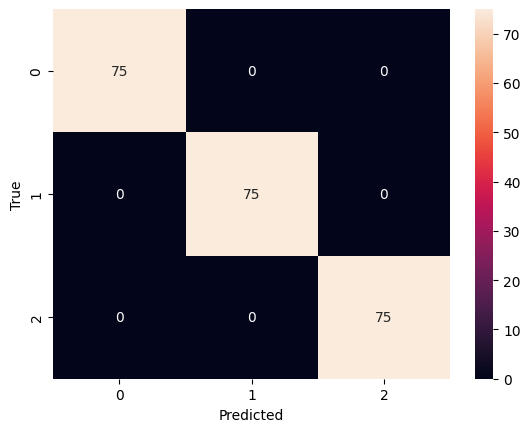

In [40]:
sns.heatmap(cm,annot=True,fmt='')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [42]:
print(classification_report(y_pred,y_test1))

              precision    recall  f1-score   support

    negative       1.00      1.00      1.00        75
     neutral       1.00      1.00      1.00        75
    positive       1.00      1.00      1.00        75

    accuracy                           1.00       225
   macro avg       1.00      1.00      1.00       225
weighted avg       1.00      1.00      1.00       225



## Generating predictions (Exciting part of notebook) 🤔

In [43]:
model = RandomForestClassifier().fit(tf_df,df1['sentiment'])
model.score(tf_df,df1['sentiment'])

1.0

In [47]:
import joblib
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from urllib.parse import urlparse

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Preprocessing Function
def textProcess(sent):
    try:
        sent = re.sub('[][)(]', ' ', sent)
        sent = [word for word in sent.split() if not urlparse(word).scheme]
        sent = ' '.join(sent)
        sent = re.sub(r'\@\w+', '', sent)
        sent = re.sub(re.compile("<.*?>"), '', sent)
        sent = re.sub("[^A-Za-z0-9]", ' ', sent)
        sent = sent.lower()
        sent = [word.strip() for word in sent.split()]
        sent = ' '.join(sent)
        tokens = word_tokenize(sent)
        tokens = [word for word in tokens if word not in stop_words]
        sent = [lemmatizer.lemmatize(word) for word in tokens]
        sent = ' '.join(sent)
        return sent
    except Exception as ex:
        print("Error:", ex)
        return sent

# Load the model
model = joblib.load('random_forest_model.joblib')

# Load CountVectorizer
cv = CountVectorizer(min_df=1)

# Example text for prediction

texts = ['Poor infrastructure with broken chairs and non-functional air conditioning in classrooms. The labs have old equipment that doesn\'t work properly',
         'The transportation facilities are inadequate, with buses arriving late and no proper timetable',
         'Sports facilities are not maintained, and the playground is always in poor condition',
         'Infrastructure is not the best but not the worst either',
         'Exam patterns are fair but sometimes delayed',
         'Excellent faculty and supportive staff',
         'Workshops and guest lectures are organized frequently to enhance student knowledge']
# Preprocess Text
processed_texts = [textProcess(text) for text in texts]

# Fit CountVectorizer on Training Data (You need to fit the vectorizer on training data before predicting)
df1 = pd.read_csv('modified.csv')
cv.fit(df1['processed_text'])

# Transform the Input Texts
text_features = cv.transform(processed_texts)

# Make Predictions
predictions = model.predict(text_features)

# Display Results
for text, pred in zip(texts, predictions):
    print(f"Text: {text} => Prediction: {pred}")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Balaji\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Balaji\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Balaji\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Text: Poor infrastructure with broken chairs and non-functional air conditioning in classrooms. The labs have old equipment that doesn't work properly => Prediction: negative
Text: The transportation facilities are inadequate, with buses arriving late and no proper timetable => Prediction: negative
Text: Sports facilities are not maintained, and the playground is always in poor condition => Prediction: negative
Text: Infrastructure is not the best but not the worst either => Prediction: negative
Text: Exam patterns are fair but sometimes delayed => Prediction: neutral
Text: Excellent faculty and supportive staff => Prediction: positive
Text: Workshops and guest lectures are organized frequently to enhance student knowledge => Prediction: positive
